# initialize

In [9]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import os
import nbimporter
import PUBLIC_inCITE_tools as ict

run_folder = '20200722_p65_inCITE_hashed' #'p65_inCITE'
target_dir = 'seq_data/%s' %run_folder

sc.settings.figdir = './analyses/%s' %run_folder
if not os.path.isdir(sc.settings.figdir): os.makedirs(sc.settings.figdir)

sc.settings.verbosity = 3             
sc.logging.print_versions()
processed_file = './write/p65_inCITE.h5ad'

antibodies = ['p65']

-----
anndata     0.7.4
scanpy      1.6.0
sinfo       0.3.1
-----
PIL                 7.2.0
PUBLIC_inCITE_tools NA
anndata             0.7.4
attr                19.1.0
backcall            0.1.0
cffi                1.12.3
cycler              0.10.0
cython_runtime      NA
dateutil            2.6.1
decorator           4.3.0
descartes           NA
get_version         2.1
google              NA
h5py                2.10.0
idna                2.8
igraph              0.8.0
importlib_metadata  1.5.0
ipykernel           5.1.2
ipython_genutils    0.2.0
ipywidgets          7.5.1
jedi                0.15.1
jinja2              2.10.1
joblib              0.11
jsonschema          3.0.2
kiwisolver          1.1.0
legacy_api_wrap     1.2
leidenalg           0.8.0
llvmlite            0.31.0
louvain             0.6.1
markupsafe          1.1.1
matplotlib          3.1.3
mizani              0.7.1
mpl_toolkits        NA
natsort             7.0.1
nbformat            4.4.0
nbimporter          NA
numba           

# compare raw gene expression counts to MULTI-seq

compare RNA library complexity (UMIs vs. gene count) from snRNA-seq obtained by inCITE-seq and MULTI-seq

In [2]:
def scatter_UMI_genes_hist(ad, samplestr): 
    x = np.log10(ad.obs['n_counts'])
    y = np.log10(ad.obs['n_genes'])
    
    # definitions for the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    spacing = 0.005

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom + height + spacing, width, 0.2]
    rect_histy = [left + width + spacing, bottom, 0.2, height]

    # start with a rectangular Figure
    plt.figure(figsize=(4,4), dpi=1200)

    ax_scatter = plt.axes(rect_scatter)
    ax_scatter.tick_params(direction='in', top=True, right=True)
    ax_histx = plt.axes(rect_histx)
    ax_histx.tick_params(direction='in', labelbottom=False)
    ax_histy = plt.axes(rect_histy)
    ax_histy.tick_params(direction='in', labelleft=False)

    ax_scatter.plot([0,4],[0,4],'k--',linewidth=1)
    ax_scatter.scatter(x, y,
                s=3, 
                color='#696969', 
                alpha=0.5)
    ax_scatter.set_xlim([0.5,4.5])
    ax_scatter.set_xticks([1,2,3,4])
    ax_scatter.set_xticklabels([1,2,3,4])
    ax_scatter.set_ylim([0,4.5])
    ax_scatter.set_yticks([1,2,3,4])
    ax_scatter.set_xlabel('UMIs', fontsize=16)
    ax_scatter.set_ylabel('Genes', fontsize=16)
    
    bins = np.arange(0, 4, 0.1)
    ax_histx.hist(x, bins=bins, facecolor='#696969')
    ax_histy.hist(y, bins=bins, orientation='horizontal', facecolor='#696969')

    ax_histx.set_xlim(ax_scatter.get_xlim())
    ax_histy.set_ylim(ax_scatter.get_ylim())
    
    ax_histx.spines['top'].set_visible(False)
    ax_histx.spines['right'].set_visible(False)
    ax_histx.spines['left'].set_visible(False)
    ax_histx.set_xticks([])
    ax_histx.set_yticks([])
    
    ax_histy.spines['top'].set_visible(False)
    ax_histy.spines['right'].set_visible(False)
    ax_histy.spines['bottom'].set_visible(False)
    ax_histy.set_xticks([])
    ax_histy.set_yticks([])

    plt.show()

    plt.savefig('%s/scatter_ngenes_UMIs_hist_%s.png' %(sc.settings.figdir, samplestr), bbox_inches='tight')

load MULTI-seq single nucleus RNA-seq data for HEK and Jurkat cell lines

In [3]:
ad_multi = sc.read_10x_mtx('seq_data/MULTI_seq_GSE129578', prefix='POC_nuc_', cache=True)
ad_multi_hg19 = ad_multi[:,[gene for gene in ad_multi.var_names if gene.startswith('hg19_')]]
ict.calc_mito_ncounts(ad_multi_hg19, case='hg19')
sc.pp.filter_cells(ad_multi_hg19, min_genes=2)

... reading from cache file cache/seq_data-MULTI_seq_GSE129578-POC_nuc_matrix.h5ad


/home/jupyter-user/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
PUBLIC_inCITE_tools.ipynb:10: RuntimeWarning: invalid value encountered in true_divide
Trying to set attribute `.obs` of view, copying.


filtered out 1243183 cells that have less than 2 genes expressed


/home/jupyter-user/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


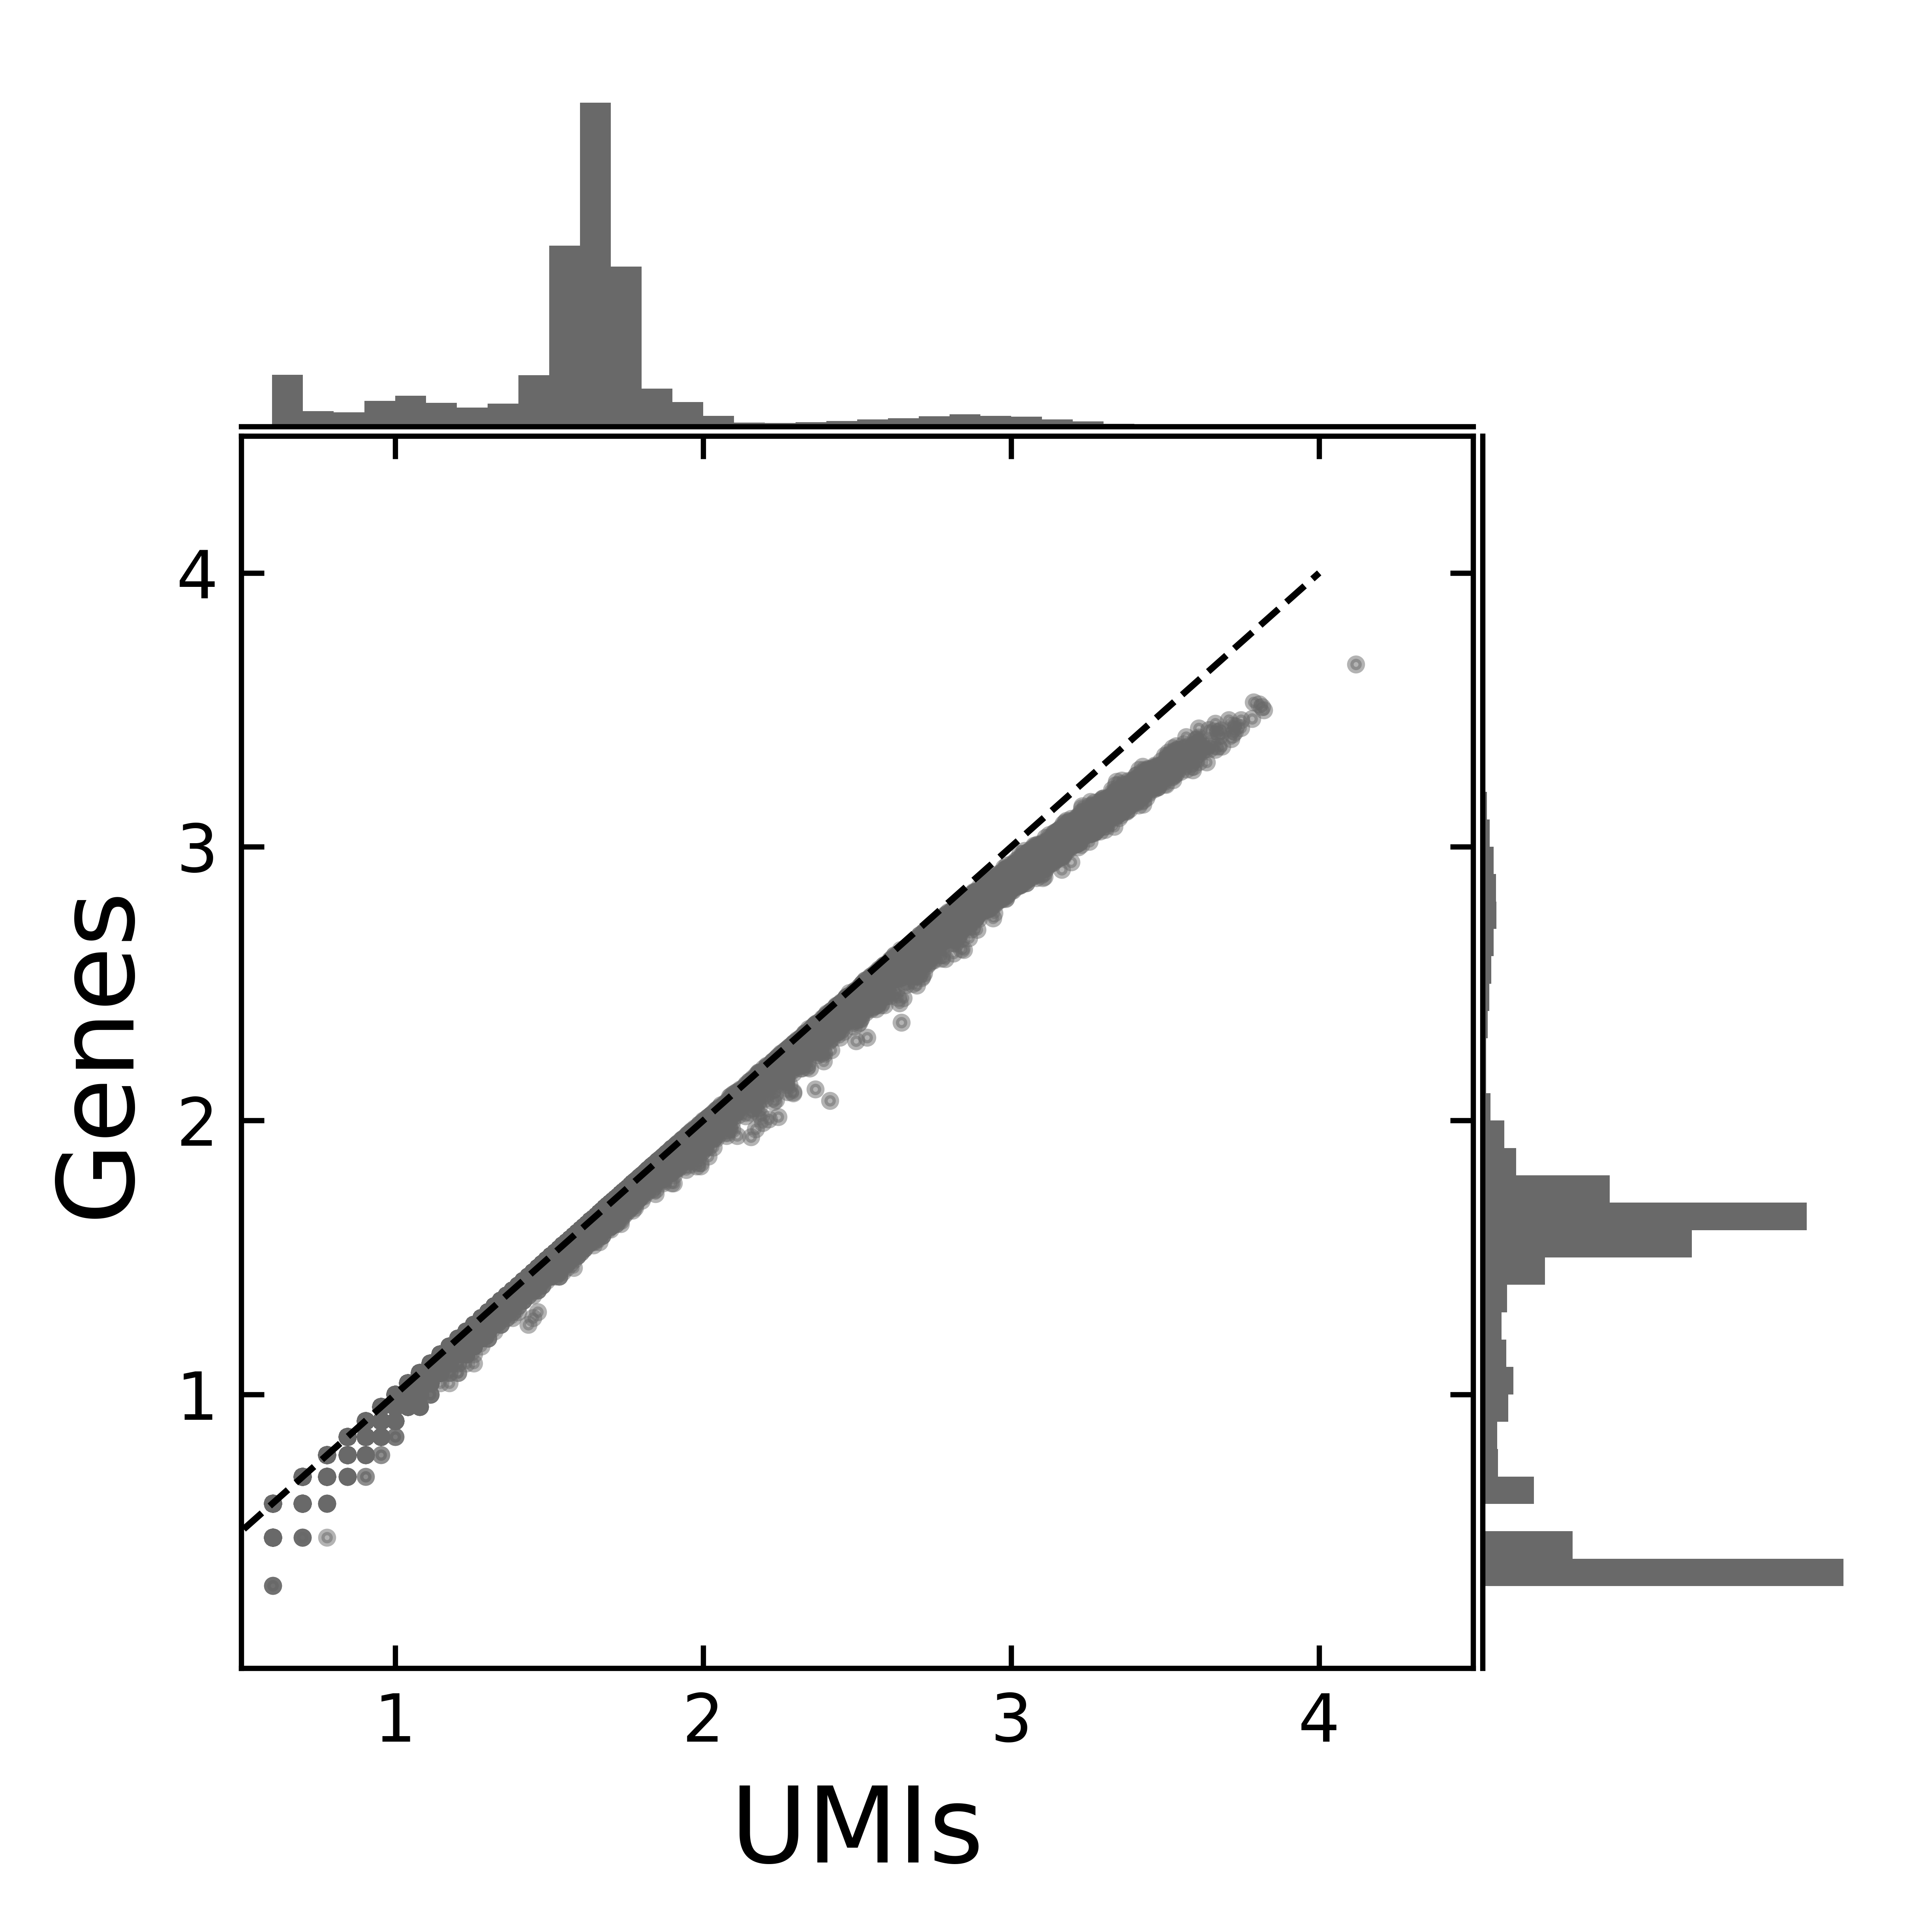

<Figure size 432x288 with 0 Axes>

In [4]:
scatter_UMI_genes_hist(ad_multi_hg19, 'MULTIseq_nuclei')

load raw inCITE-seq snRNA-seq for HeLa cells

In [5]:
raw_h5 = 'seq_data/20200722_p65_inCITE_hashed/pooled_gex/raw_feature_bc_matrix.h5'
ad_raw = sc.read_10x_h5(raw_h5)
ict.calc_mito_ncounts(ad_raw, case='human')
sc.pp.filter_cells(ad_raw, min_genes=2)

reading seq_data/20200722_p65_inCITE_hashed/pooled_gex/raw_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:10)


/home/jupyter-user/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
PUBLIC_inCITE_tools.ipynb:10: RuntimeWarning: invalid value encountered in true_divide


filtered out 6677633 cells that have less than 2 genes expressed


/home/jupyter-user/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


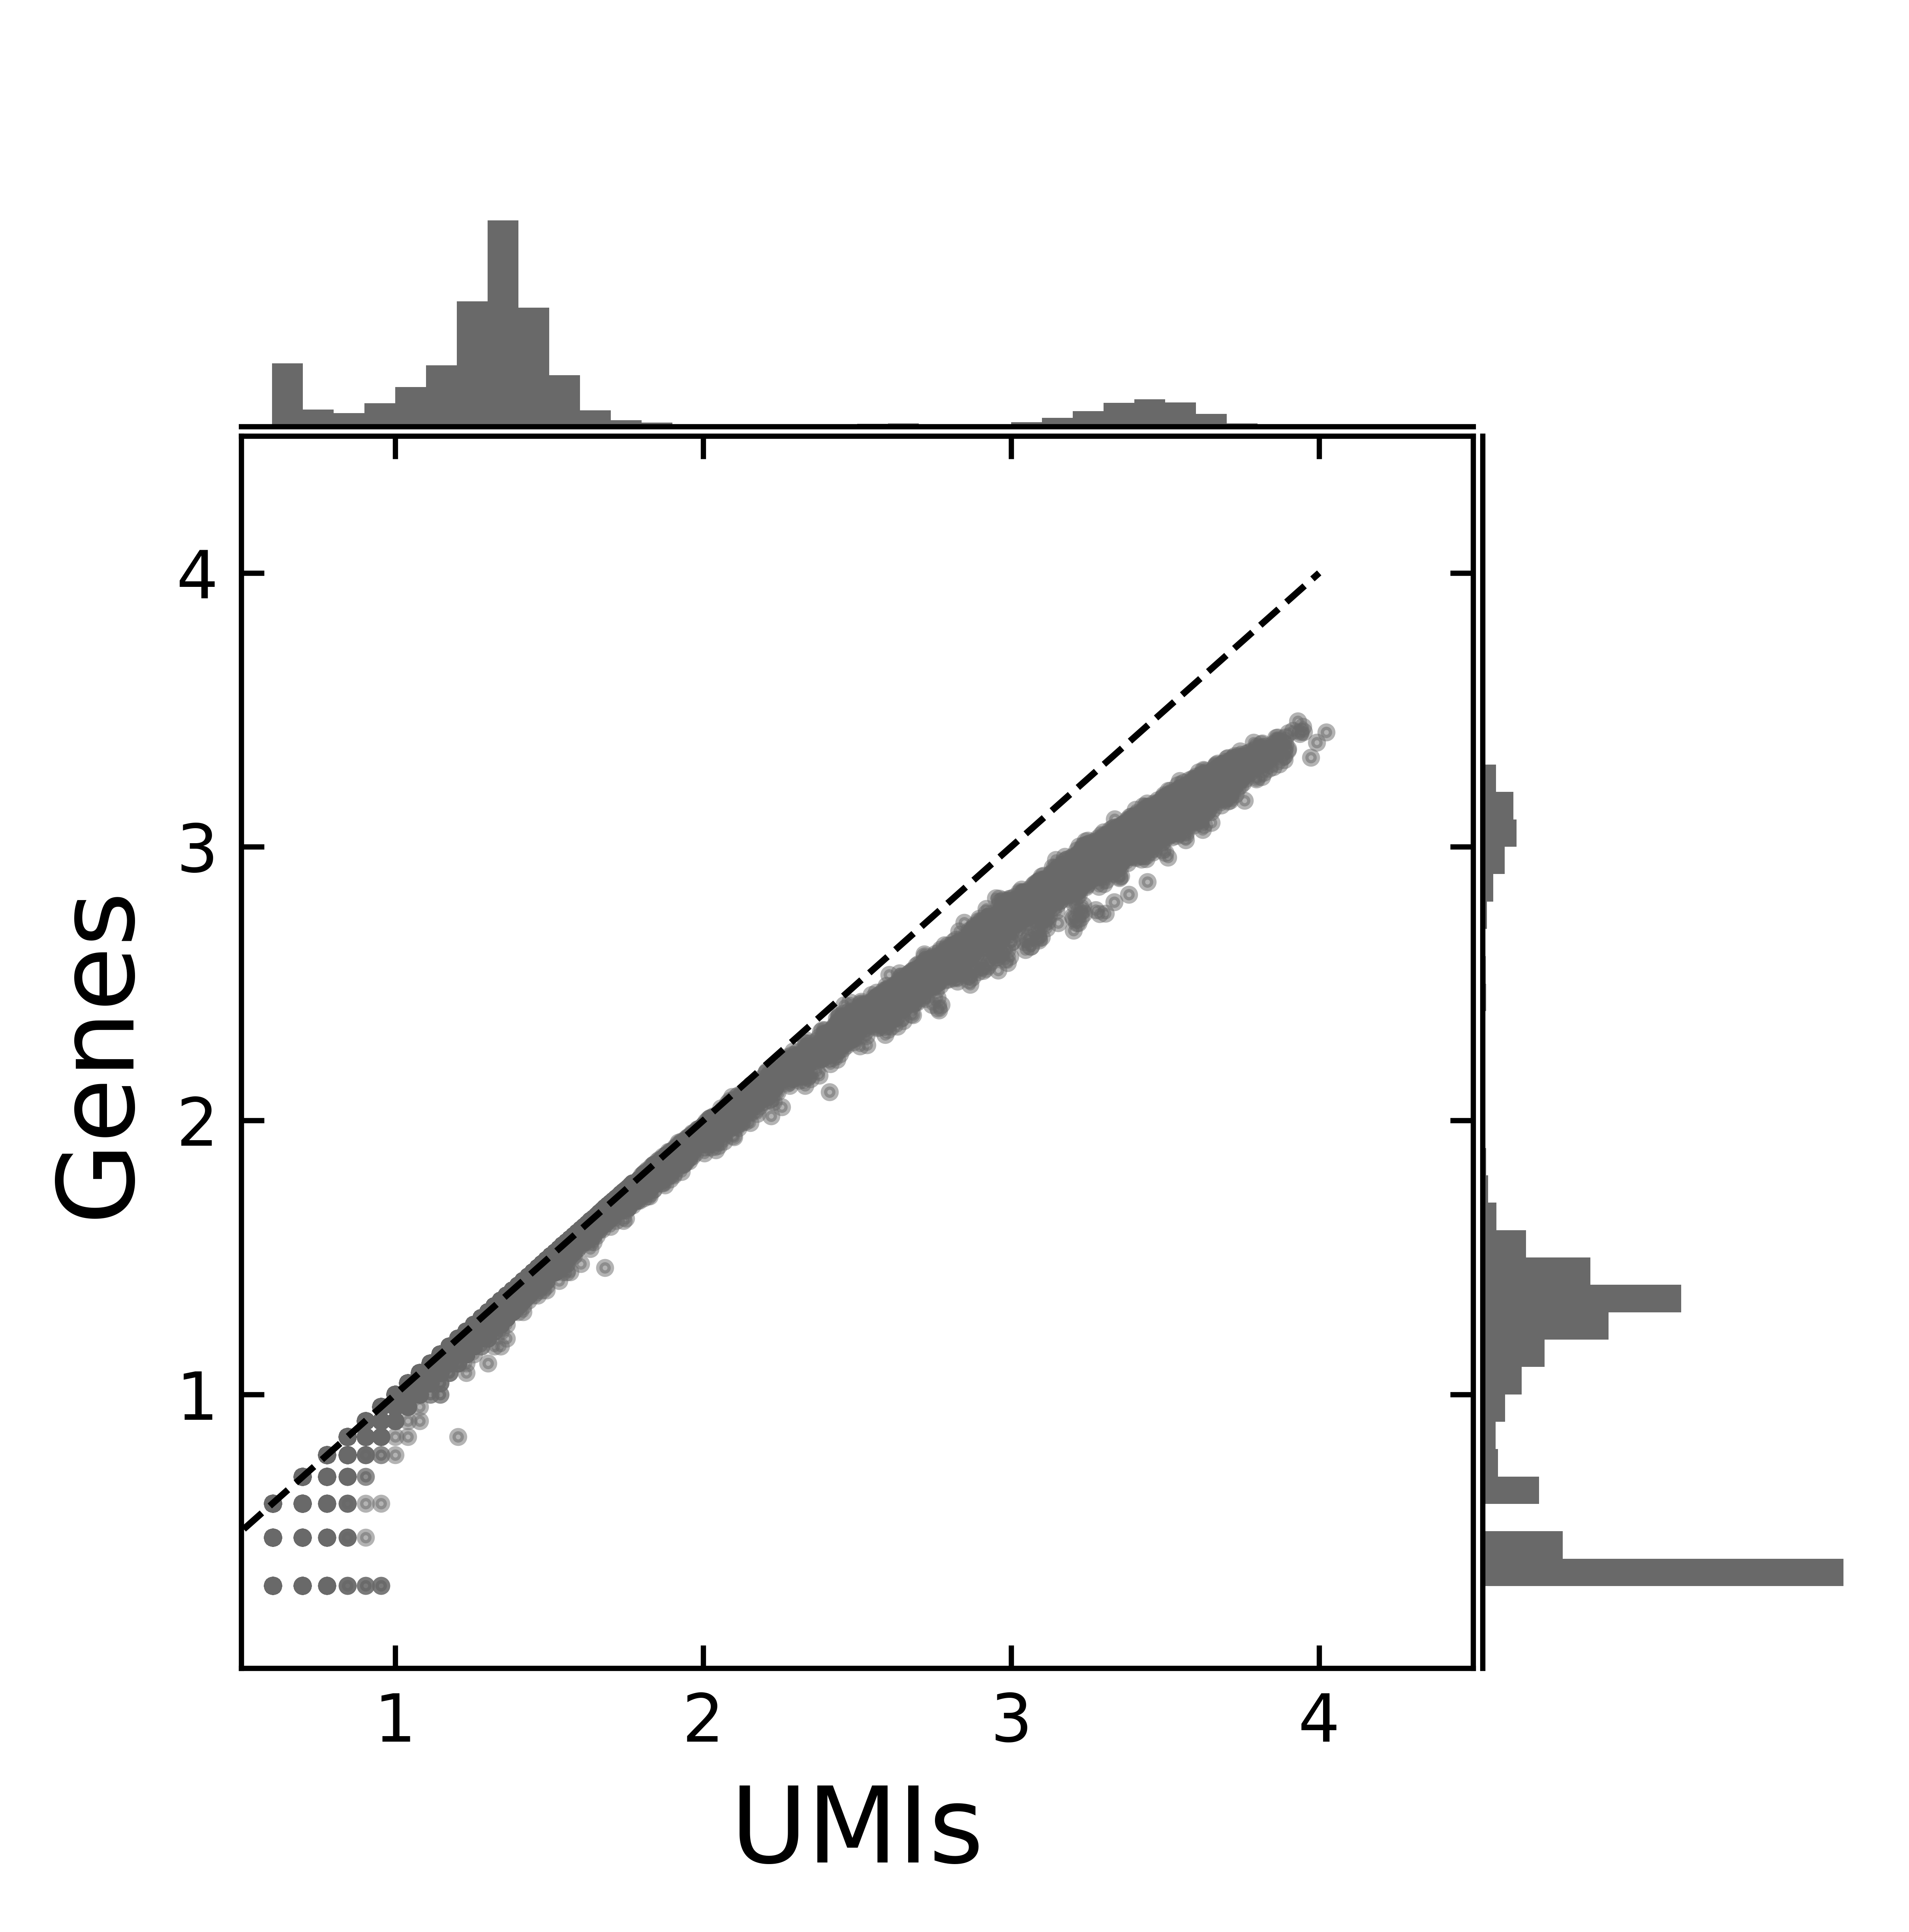

<Figure size 432x288 with 0 Axes>

In [6]:
scatter_UMI_genes_hist(ad_raw, '_HeLa_raw')

# Load demultiplexed inCITE data

load raw counts

In [10]:
# gene expression counts - data are already demultiplexed with DemuxEM using nuclei hashing information, 
# which also filters low quality droplets
demux_gex = sc.read('%s/hashing_out_demux.h5ad' %target_dir)

# demultiplexed nuclei HTO hashtag counts
demux_hashtags = sc.read('%s/hashing_out_ADTs.h5ad' %target_dir)

# demultiplexed p65 antibody counts (ADT) 
ADT_raw = pd.read_csv('%s/pooled_adt/pooled_adt.csv' %target_dir, index_col='Antibody')

In [11]:
# write to file
out_path='write/submission_files'
pd.DataFrame(data=demux_gex.X.toarray(), 
             index=demux_gex.obs_names, 
             columns=demux_gex.var_names).to_csv('%s/HeLa_counts.csv' %out_path)
demux_gex.obs.to_csv('%s/HeLa_barcodes.csv' %out_path)
demux_gex.obs.to_csv('%s/HeLa_genes.csv' %out_path)

merge all 3 data modes

In [15]:
adata = ict.merge_adt_and_gex(ADT_raw, demux_gex, antibodies)
adata.obs['hashtag_counts'] = demux_hashtags.obs['counts']

Merged GEX and ADT in 1.310 seconds


## filter inCITE data based on RNA and protein counts

In [16]:
# remove cells with ambiguous assignment from DemuxEM
print(adata.shape)
adata = adata[adata.obs['assignment'].isin(['NT','TNFa'])]
print(adata.shape)

(12090, 33694)
(11374, 33694)


/home/jupyter-user/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


In [17]:
# calculate mitochondrial content
ict.calc_mito_ncounts(adata, case='human')

Trying to set attribute `.obs` of view, copying.


AnnData object with n_obs × n_vars = 11374 × 33694
    obs: 'Channel', 'n_genes', 'n_counts', 'demux_type', 'assignment', 'p65', 'hashtag_counts', 'frac_mito'
    var: 'gene_ids', 'robust'
    uns: 'background_probs', 'genome'
    obsm: 'raw_probs'

# QC

In [18]:
print(adata.shape)
sc.pp.filter_genes(adata, min_cells=10)
print(adata.shape)

(11374, 33694)
filtered out 19563 genes that are detected in less than 10 cells


/home/jupyter-user/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


(11374, 14131)


/home/jupyter-user/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/home/jupyter-user/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
/home/jupyter-user/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
/home/jupyter-user/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12

/home/jupyter-user/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


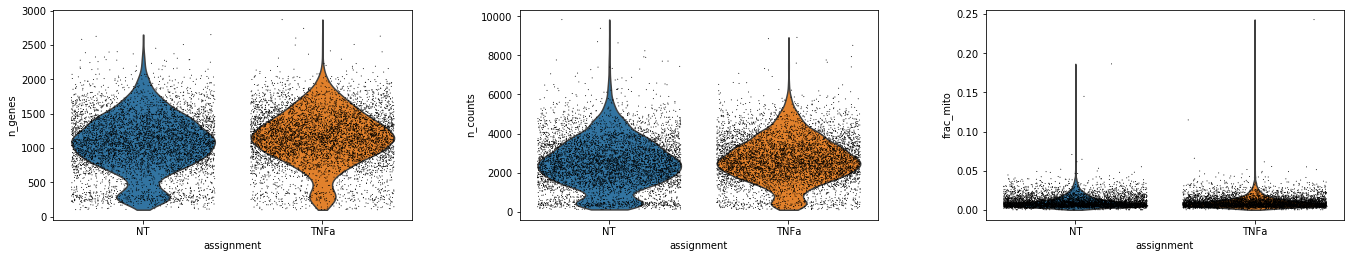

In [19]:
sc.pl.violin(adata, ['n_genes', 'n_counts', 'frac_mito'],
             groupby='assignment',
             jitter=0.4, 
             multi_panel=True, log=False, cut=0,
             save='_QC')

## secondary filtering

In [20]:
print(adata.shape)
sc.pp.filter_cells(adata, min_genes=500)
adata = adata[adata.obs['n_counts']<5000,:]
sc.pp.filter_genes(adata, min_cells=10)
print(adata.shape)

(11374, 14131)
filtered out 1015 cells that have less than 500 genes expressed


/home/jupyter-user/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/home/jupyter-user/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


filtered out 189 genes that are detected in less than 10 cells


Trying to set attribute `.var` of view, copying.
/home/jupyter-user/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


(10014, 13942)


/home/jupyter-user/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


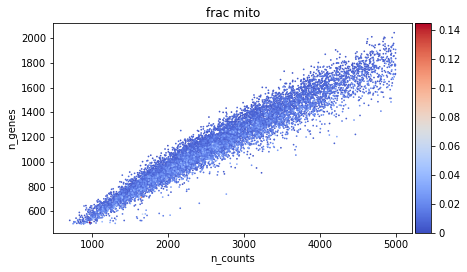

In [21]:
sc.pl.scatter(adata, x='n_counts', y='n_genes', color='frac_mito', 
              color_map='coolwarm',
              save='_postfilter_QC_ngenes_mito')

## Normalize nuclear protein levels

In [22]:
ict.normalize_CITE(adata, antibodies)

In [23]:
ncts = np.median(adata.obs['n_counts'])
ngens = np.median(adata.obs['n_genes'])
print('Median %0.2f counts, %0.2f genes' %(ncts, ngens))

Median 2619.00 counts, 1146.00 genes


## Compare p65 counts, nuclei hashtag counts, and RNA UMIs

plot to show that polyA-based capture efficiency affects protein and RNA abundances

0.22640705445634166 0.47742385788490366 0.0


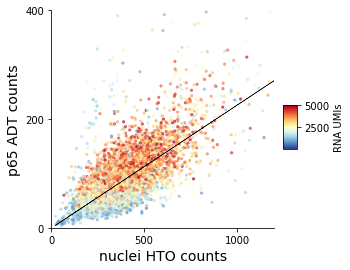

In [109]:
import scipy.stats as stats

fig, ax = plt.subplots(figsize=(4,4))
# ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('nuclei HTO counts',fontsize=14)
plt.ylabel('p65 ADT counts',fontsize=14)
plt.ylim([0, 400])
plt.yticks([0,200,400])
plt.xticks([0,500,1000])
plt.xlim([0,1200])

cm = plt.cm.get_cmap('RdYlBu_r')
cax = fig.add_axes([.93, .4, .05, .15])
sfig = ax.scatter(adata.obs['hashtag_counts'], adata.obs['p65'], 
            s=5, c=adata.obs['n_counts'], alpha=0.6, 
            cmap=cm)
cbar = fig.colorbar(sfig, cax=cax)
sfig.set_clim(100,5000)
cbar.ax.set_ylabel('RNA UMIs', rotation=90)

# regression
X_HTO = [float(i) for i in list(adata.obs['hashtag_counts'])]
Y_p65 = list(adata.obs['p65'])
m, b = np.polyfit(X_HTO, Y_p65, 1)
ax.plot(X_HTO, [m*x for x in X_HTO] + b, color='k', linewidth=0.5)

slope, intercept, r_value, p_value, std_err = stats.linregress(X_HTO, Y_p65)
print(slope, r_value**2, p_value)

plt.savefig('%s/scatter_ADT_vs_HTO.pdf' %(sc.settings.figdir), bbox_inches='tight')

## Compare p65 levels between NT and TNFa populations

In [24]:
NT = adata[adata.obs['assignment']=='NT'].obs
TNFa = adata[adata.obs['assignment']=='TNFa'].obs

/home/jupyter-user/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


/home/jupyter-user/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/home/jupyter-user/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
/home/jupyter-user/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


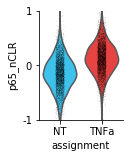

In [25]:
from statannot import add_stat_annotation

plt.figure(figsize=(1.5,2))
axes = plt.gca()
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
ytx = [-1,0,1]
axes.set_yticks(ytx)
axes.set_yticklabels(labels=ytx, fontsize=10)
axes.set_ylim([-1,1])

axes = sc.pl.violin(adata, 'p65_nCLR',
             saturation=0.9, alpha=0.5, groupby='assignment',
             color='#34c6f4', palette=['#34c6f4','#ef3b39'], 
             ax=axes, size=0.3,
            save='_p65_nCLR_NT_TNFa')


## Store layers of ln(X+1) counts and z scores

In [26]:
adata.layers["counts"] = adata.X.copy()
sc.pp.normalize_total(adata, layers=['counts'])
sc.pp.log1p(adata, layer='counts')

adata.layers['zscore'] = adata.layers['counts'].copy()
sc.pp.scale(adata, max_value=10, layer='zscore')

normalizing counts per cell
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


## map batch categories to color

In [27]:
adata.obs.assignment.cat.reorder_categories(new_categories=['NT','TNFa'])
adata.obs['color'] = adata.obs['assignment'].map({'NT':'#34c6f4', 'TNFa':'#ef3b39'})

# Data processing

normalize

In [28]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e3)
sc.pp.log1p(adata)
adata.raw = adata

normalizing by total count per cell


/home/jupyter-user/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


add cell cycle

calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    554 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    682 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


/home/jupyter-user/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
... storing 'phase' as categorical


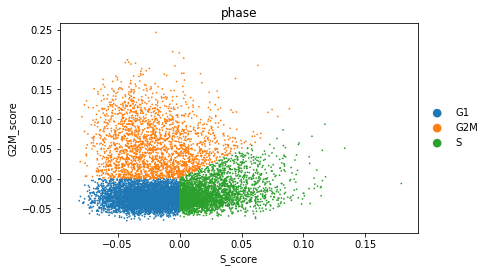

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
computing PCA
    with n_comps=50


/home/jupyter-user/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/home/jupyter-user/.local/lib/python3.6/site-packages/scanpy/preprocessing/_simple.py:806: UserWarning: Revieved a view of an AnnData. Making a copy.


    finished (0:00:00)


/home/jupyter-user/.local/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


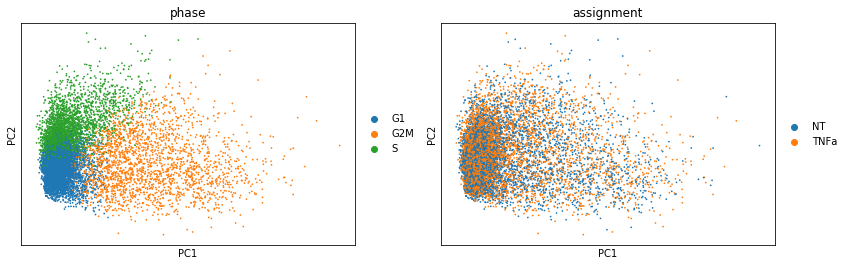

In [29]:
ict.add_three_state_cell_cycle(adata)

regress out counts and genes

In [30]:
sc.pp.regress_out(adata, ['n_counts','n_genes']) 

regressing out ['n_counts', 'n_genes']
    sparse input is densified and may lead to high memory use
    finished (0:03:50)


scale data

In [31]:
sc.pp.scale(adata, max_value=10)

# Save processed data

In [ ]:
adata.write(processed_file)